In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

# multipul regression (toyota)

In [2]:
#Read the data
toyota = pd.read_csv("C:\\Users\\ASUS\\Downloads\\DATA SCIENCE\\ASSIGNMENTS\\multiple linear regression\\ToyotaCorolla.csv")
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [3]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [4]:
toyota.corr()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,-0.109375,-0.079713,0.066265,-0.117704,...,-0.238940,-0.236723,-0.091587,-0.010971,-0.139708,-0.028704,-0.136398,-0.022232,-0.011611,0.159171
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age_08_04,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
HP,-0.109375,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,...,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,-0.079713,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Automatic,0.066265,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786
cc,-0.117704,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,...,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725


In [5]:
toyota.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [6]:
toyota1 = toyota.iloc[:,[2,3,6,8,12,13,15,16,17]]

In [7]:
print(toyota1.head())

   Price  Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0  13500         23  46986  90  2000      3      5            210    1165
1  13750         23  72937  90  2000      3      5            210    1165
2  13950         24  41711  90  2000      3      5            210    1165
3  14950         26  48000  90  2000      3      5            210    1165
4  13750         30  38500  90  2000      3      5            210    1170


In [8]:
toyota2 = toyota1.rename({'Age_08_04':'Age','Quarterly_Tax':'QT'},axis = 1)

In [9]:
toyota2.head()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [10]:
toyota2.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QT,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


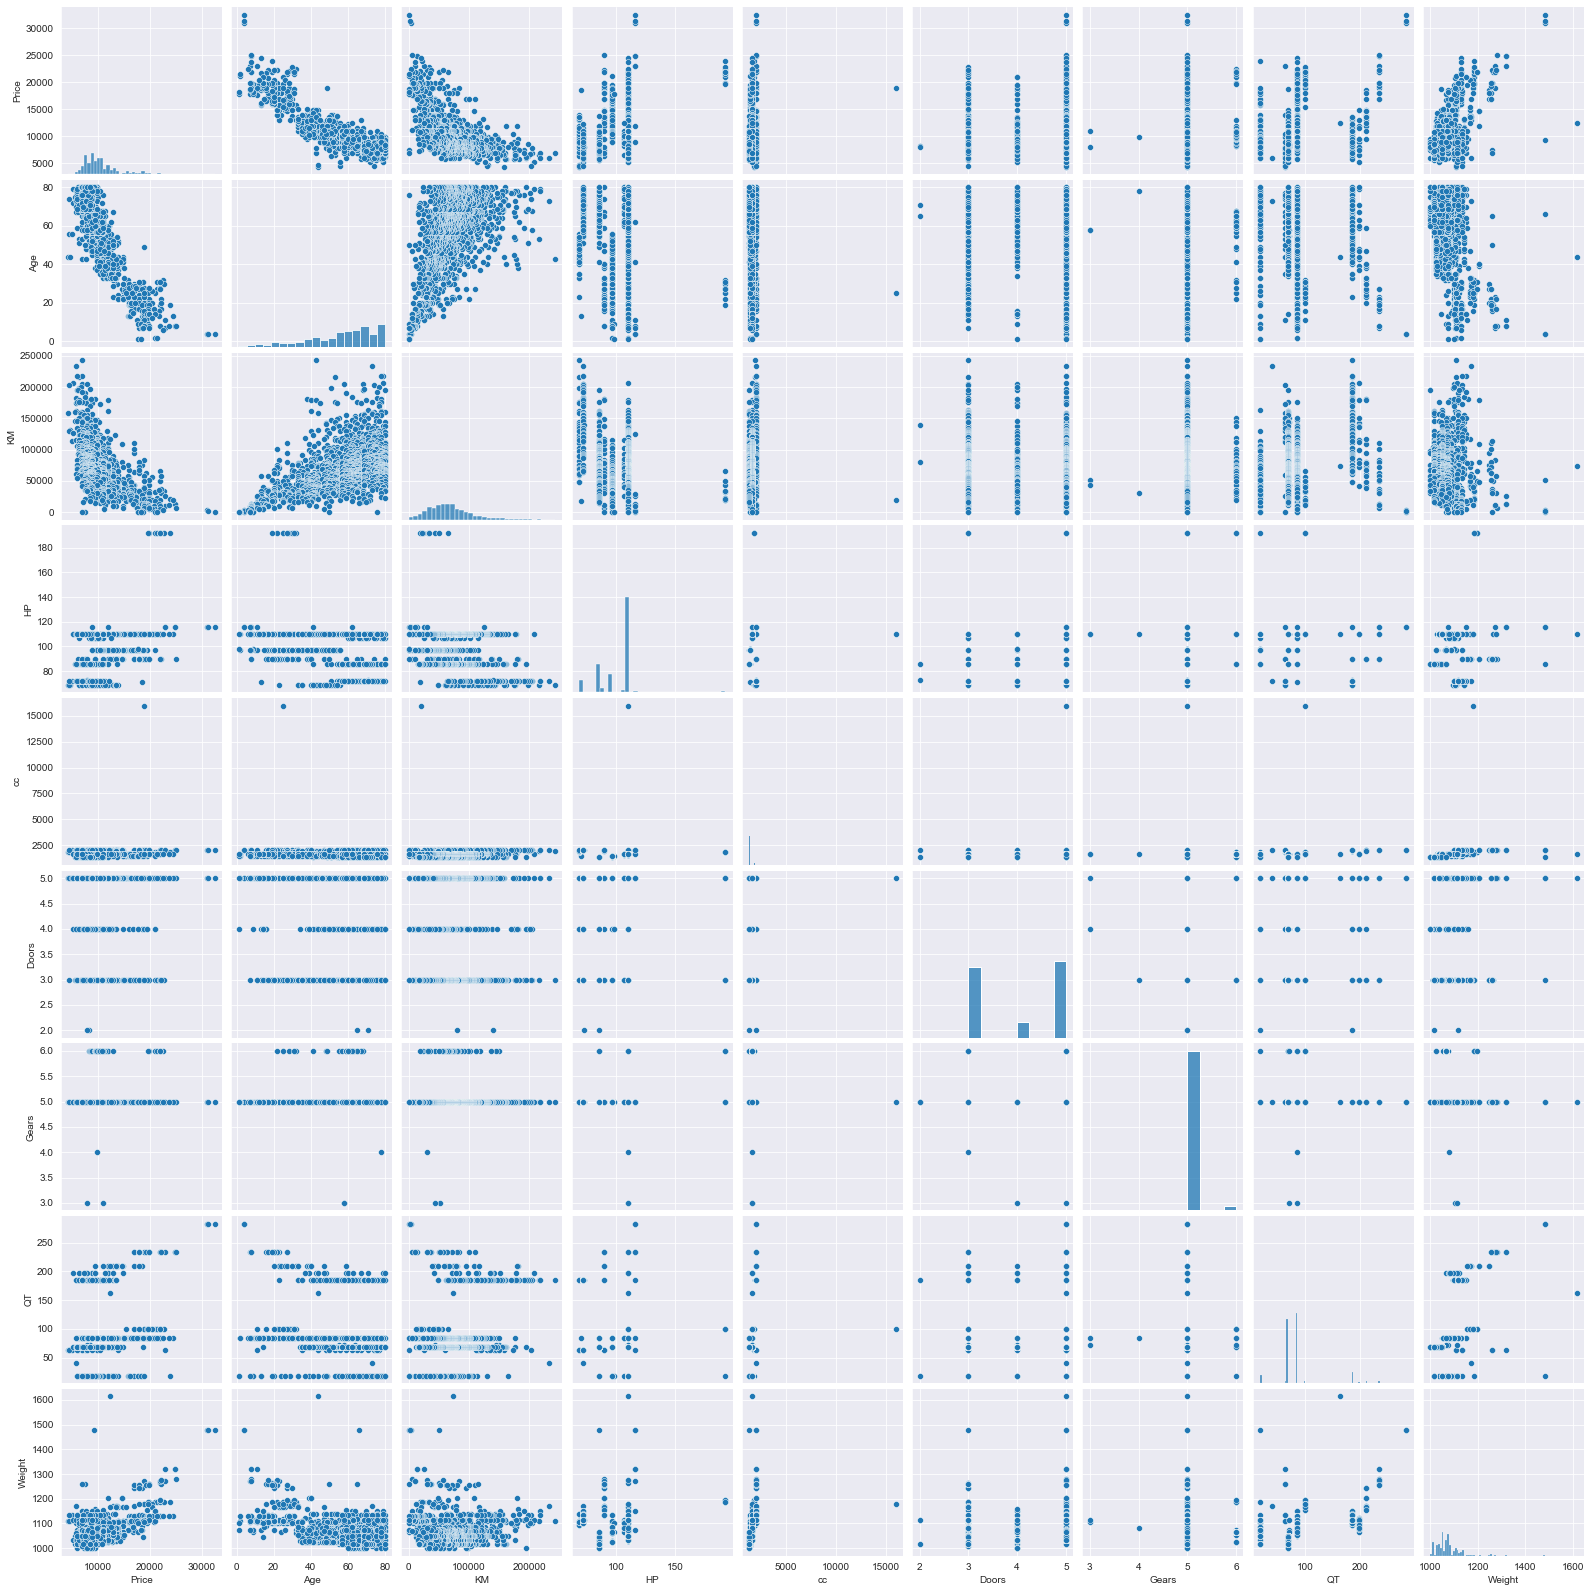

In [11]:
sns.set_style(style='darkgrid')
sns.pairplot(toyota2)

In [12]:
modelfinal = toyota2.drop(['Doors','Gears'],axis=1)

In [13]:
print(modelfinal)

      Price  Age     KM   HP    cc   QT  Weight
0     13500   23  46986   90  2000  210    1165
1     13750   23  72937   90  2000  210    1165
2     13950   24  41711   90  2000  210    1165
3     14950   26  48000   90  2000  210    1165
4     13750   30  38500   90  2000  210    1170
...     ...  ...    ...  ...   ...  ...     ...
1431   7500   69  20544   86  1300   69    1025
1432  10845   72  19000   86  1300   69    1015
1433   8500   71  17016   86  1300   69    1015
1434   7250   70  16916   86  1300   69    1015
1435   6950   76      1  110  1600   19    1114

[1436 rows x 7 columns]


In [14]:
#prepare the model 
model = smf.ols('Price~Age+KM+HP+cc+QT+Weight',data=modelfinal).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1498.
Date:                Tue, 14 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:05:38   Log-Likelihood:                -12380.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1429   BIC:                         2.481e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2669.4843   1051.241     -2.539      0.011   -4731.625    -607.344
Age         -121.7929      2.622    -46.449      0.000    -126.937    -116.649
KM            -0.0205      0.001    -16.411      0.000      -0.023      -0.018
HP            33.6858      2.741     12.288      0.000      28.308      39.063
cc            -0.1244      0.090     -1.377      0.169      -0.302       0.053
QT             4.1922      1.307      3.207      0.001       1.628       6.757
Weight        16.8156      1.036     16.239      0.000      14.784      18.847
==============================================================================
Omnibus:                      148.179   Durbin-Watson:                   1.548
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              952.170
Skew:                          -0.220   Prob(JB):                    1.73e-207
Kurtosis:                       6.965   Cond. No.                     2.31e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
print("R squared value:",model.rsquared,"Adjusted R squared value:",model.rsquared_adj)

R squared value: 0.8628570632699418 Adjusted R squared value: 0.8622812356839513


In [16]:
#prepare the model 
model1 = smf.ols('Price~cc',data=modelfinal).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           1.55e-06
Time:                        19:05:38   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
#prepare the model 
model2= smf.ols('Price~QT',data=modelfinal).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     72.38
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           4.41e-17
Time:                        19:05:38   Log-Likelihood:                -13771.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1434   BIC:                         2.756e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9046.7382    218.889     41.330      0.000    8617.362    9476.115
QT            19.3301      2.272      8.507      0.000      14.873      23.787
==============================================================================
Omnibus:                      369.212   Durbin-Watson:                   0.276
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              843.513
Skew:                           1.417   Prob(JB):                    6.82e-184
Kurtosis:                       5.462   Cond. No.                         226.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model3 = smf.ols('Price~cc+QT',data=modelfinal).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     39.22
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           2.60e-17
Time:                        19:05:38   Log-Likelihood:                -13769.
No. Observations:                1436   AIC:                         2.754e+04
Df Residuals:                    1433   BIC:                         2.756e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8321.3516    371.537     22.397      0.000    7592.538    9050.165
cc             0.5576      0.231      2.414      0.016       0.105       1.011
QT            17.5637      2.383      7.369      0.000      12.888      22.239
==============================================================================
Omnibus:                      368.425   Durbin-Watson:                   0.275
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              844.976
Skew:                           1.412   Prob(JB):                    3.28e-184
Kurtosis:                       5.480   Cond. No.                     6.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# VIF Value

In [19]:
r_age = smf.ols('Age~KM+HP+cc+QT+Weight',data=modelfinal).fit().rsquared
vif_age = 1/(1-r_age)

In [20]:
r_km = smf.ols('KM~Age+HP+cc+QT+Weight',data=modelfinal).fit().rsquared
vif_km = 1/(1-r_km)

In [21]:
r_HP = smf.ols('HP~Age+KM+cc+QT+Weight',data=modelfinal).fit().rsquared
vif_HP = 1/(1-r_HP)

In [22]:
r_cc = smf.ols('cc~Age+HP+KM+QT+Weight',data=modelfinal).fit().rsquared
vif_cc = 1/(1-r_cc)

In [23]:
r_QT = smf.ols('QT~Age+HP+KM+cc+Weight',data=modelfinal).fit().rsquared
vif_QT = 1/(1-r_QT)

In [24]:
r_weight = smf.ols('Weight~Age+HP+KM+cc+QT',data=modelfinal).fit().rsquared
vif_weight = 1/(1-r_weight)


In [25]:
d1 = pd.DataFrame({'Variables': ['Age','KM','HP','cc','QT','Weight'],'VIF':[vif_age,vif_km,r_HP,vif_cc,vif_QT,vif_weight]})
d1

,Variables,VIF
0,Age,1.884073
1,KM,1.746582
2,HP,0.251476
3,cc,1.163426
4,QT,2.290254
5,Weight,2.353601


# Residual Analysis
#Test for Normality of Residuals (Q-Q Plot)

In [26]:
res=model.resid
res

0      -3317.422641
1      -2534.232763
2      -2854.009977
3      -1481.210143
4      -2473.303708
           ...     
1431   -1265.258578
1432    2581.553403
1433      73.997148
1434   -1299.850398
1435   -3442.906500
Length: 1436, dtype: float64

In [27]:
res.mean()

1.4325301576351286e-09

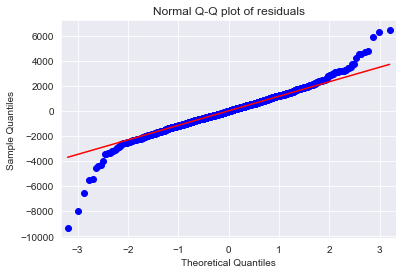

In [28]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [29]:
list(np.where(model.resid>4000))

[array([ 109,  110,  111,  125,  147,  171,  523, 1058], dtype=int64)]

# Residual Plot for Homoscedasticity

In [30]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

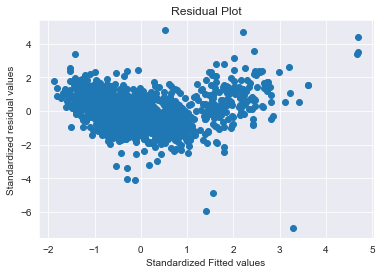

In [31]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

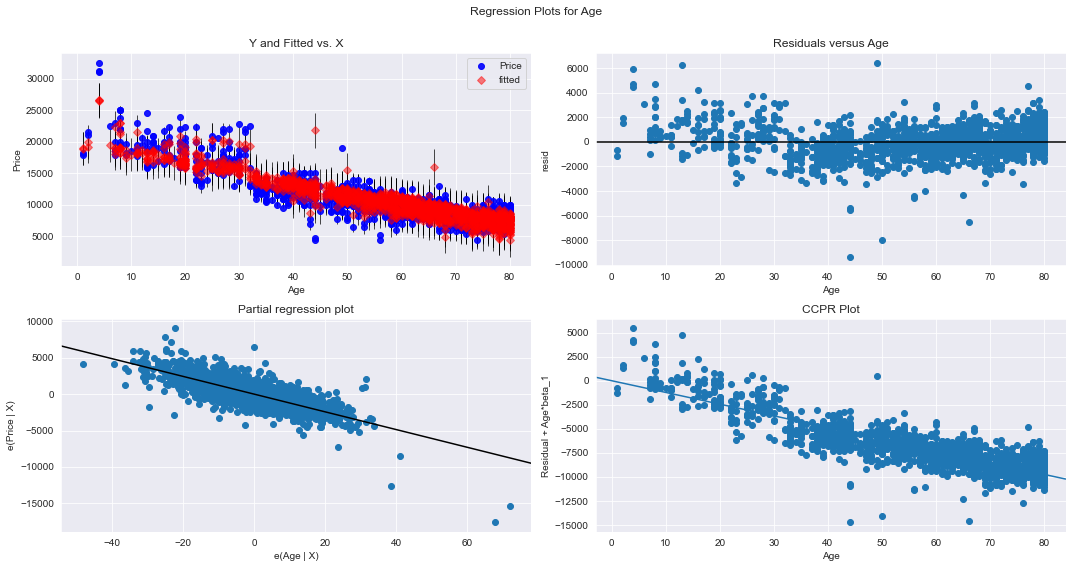

In [32]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

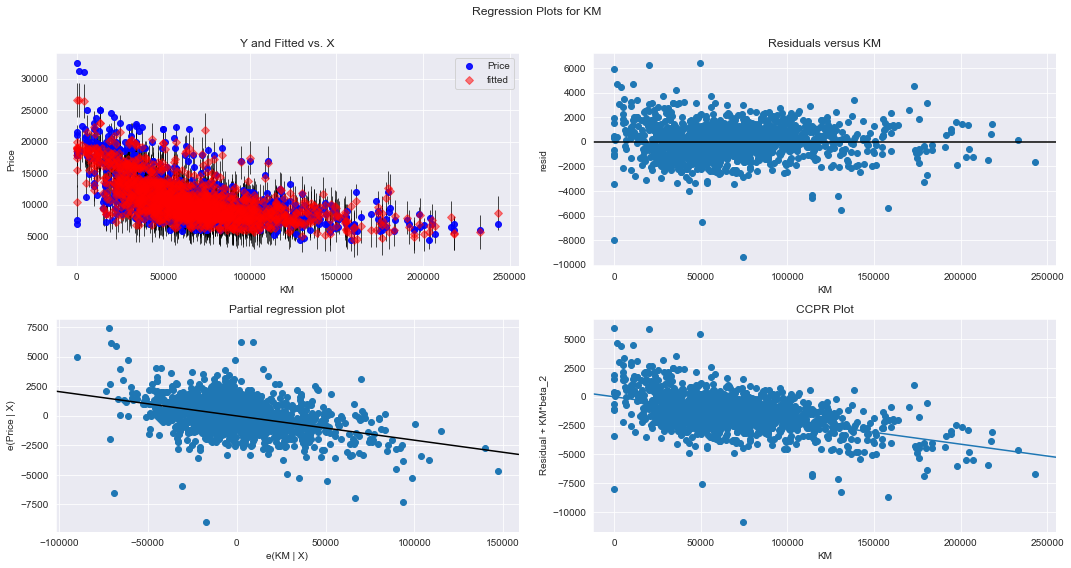

In [33]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

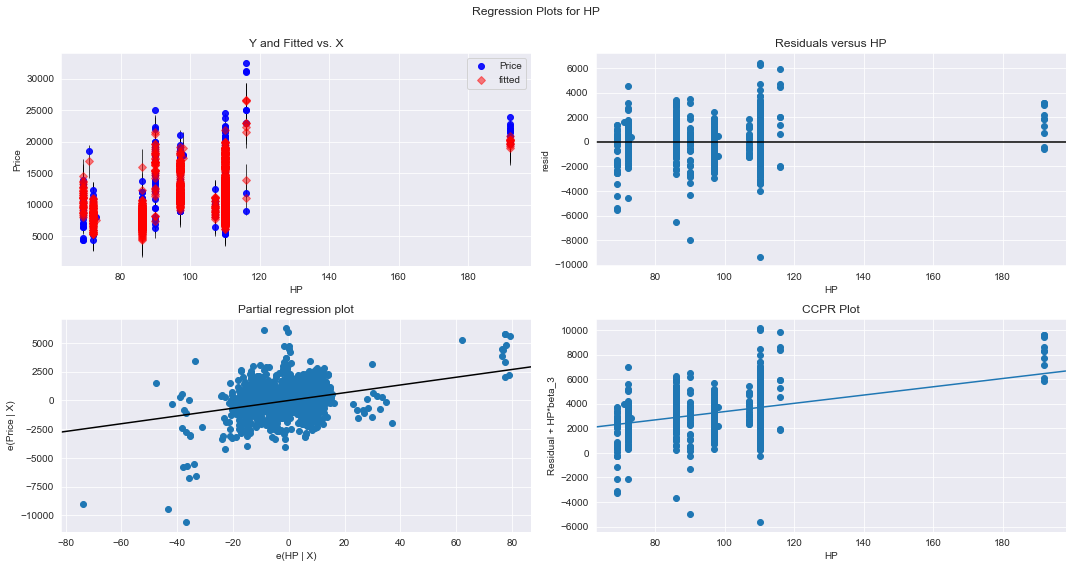

In [34]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

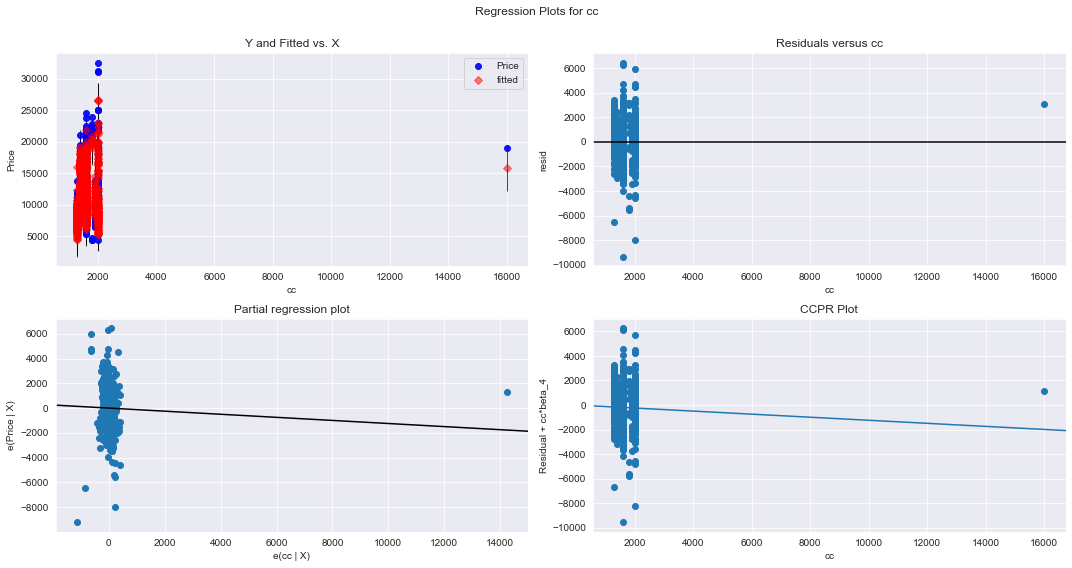

In [35]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

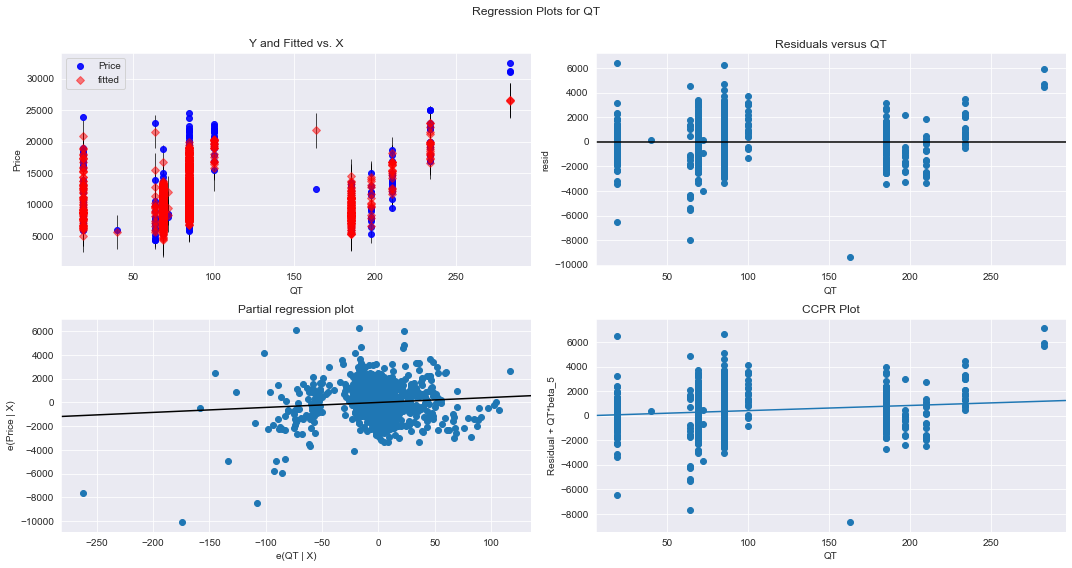

In [36]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "QT", fig=fig)
plt.show()

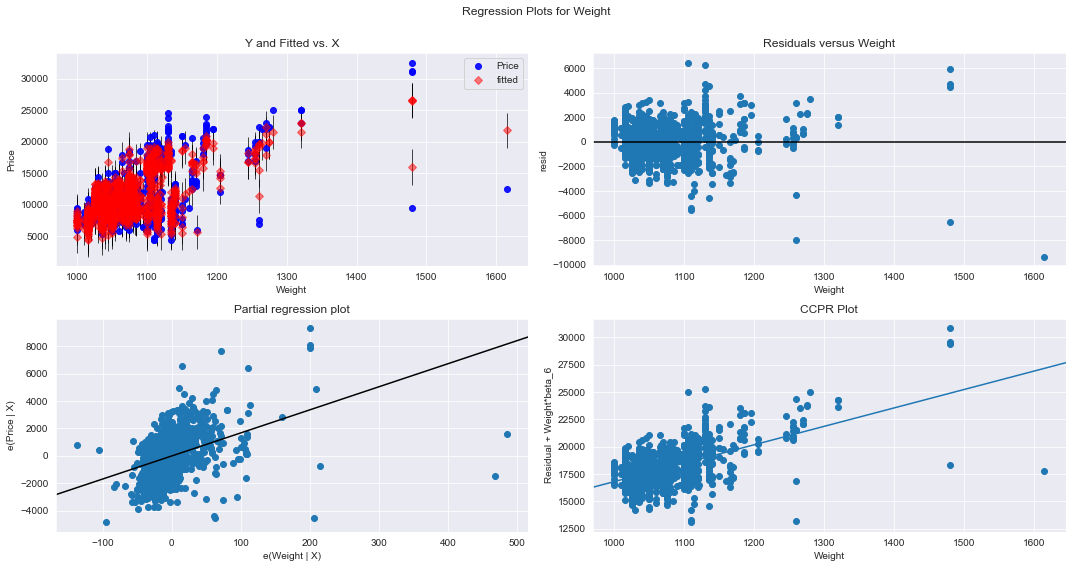

In [37]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

# Model Deletion Diagnostics
#Detecting Influencers/Outliers

# Cook’s Distance

In [38]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

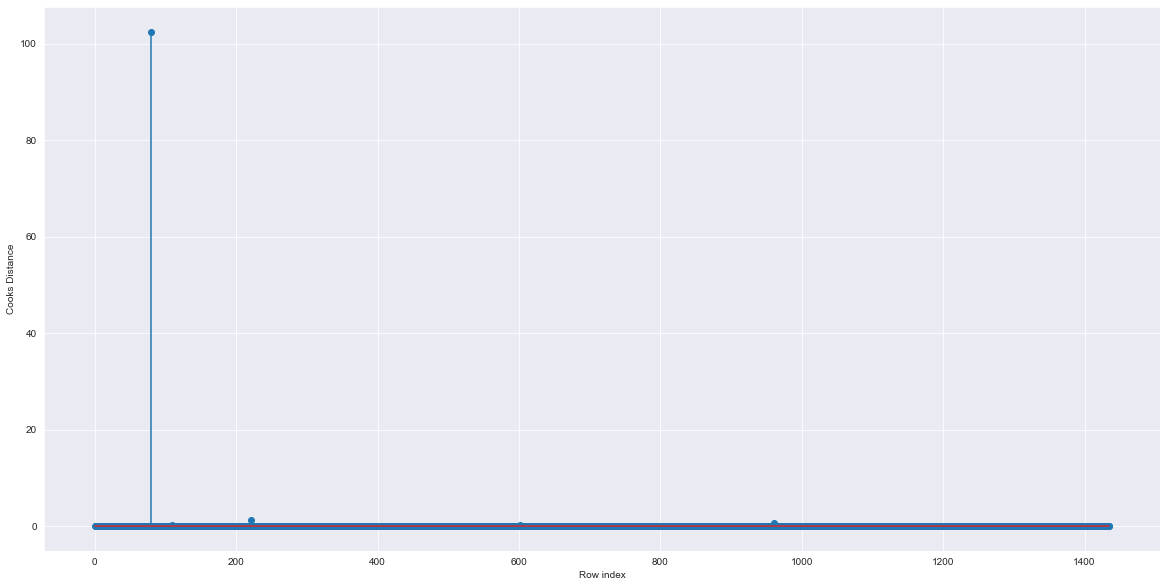

In [39]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 10))
plt.stem(np.arange(len(modelfinal)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [40]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))  

(80, 102.42006677733184)

# Improving the model

In [41]:
#Load the data
toyotaA= pd.read_csv("C:\\Users\\ASUS\\Downloads\\DATA SCIENCE\\ASSIGNMENTS\\multiple linear regression\\ToyotaCorolla.csv")

In [42]:
#Discard the data points which are influencers and reasign the row number (reset_index()) 
toyotaB=toyotaA.drop(toyota1.index[[80]],axis=0).reset_index()

In [43]:
toyotaB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435 entries, 0 to 1434
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             1435 non-null   int64 
 1   Id                1435 non-null   int64 
 2   Model             1435 non-null   object
 3   Price             1435 non-null   int64 
 4   Age_08_04         1435 non-null   int64 
 5   Mfg_Month         1435 non-null   int64 
 6   Mfg_Year          1435 non-null   int64 
 7   KM                1435 non-null   int64 
 8   Fuel_Type         1435 non-null   object
 9   HP                1435 non-null   int64 
 10  Met_Color         1435 non-null   int64 
 11  Color             1435 non-null   object
 12  Automatic         1435 non-null   int64 
 13  cc                1435 non-null   int64 
 14  Doors             1435 non-null   int64 
 15  Cylinders         1435 non-null   int64 
 16  Gears             1435 non-null   int64 
 17  Quarterly_Tax 

In [44]:
toyota = toyotaB.iloc[:,[3,4,7,9,12,13,17,18]]

In [45]:
toyota.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Quarterly_Tax,Weight
0,13500,23,46986,90,0,2000,210,1165
1,13750,23,72937,90,0,2000,210,1165
2,13950,24,41711,90,0,2000,210,1165
3,14950,26,48000,90,0,2000,210,1165
4,13750,30,38500,90,0,2000,210,1170


In [46]:
rename=toyota.rename(columns ={'Age_08_04':'age','Automatic':'at','Quarterly_Tax':'qt'}, inplace =False)

In [47]:
rename.head()

,Price,age,KM,HP,at,cc,qt,Weight
0,13500,23,46986,90,0,2000,210,1165
1,13750,23,72937,90,0,2000,210,1165
2,13950,24,41711,90,0,2000,210,1165
3,14950,26,48000,90,0,2000,210,1165
4,13750,30,38500,90,0,2000,210,1170


# Build Model

In [48]:
#Exclude variable "ad" and generate R-Squared and AIC values
final_ml_cc= smf.ols('Price~age+KM+HP+at+qt+Weight',data = rename).fit()

In [49]:
(final_ml_cc.rsquared,final_ml_cc.aic)

(0.8627554268431559, 24754.26317538379)

In [50]:
final_ml_qt= smf.ols('Price~age+KM+HP+at+cc+Weight',data = rename).fit()

In [51]:
(final_ml_qt.rsquared,final_ml_qt.aic)

(0.8647429662584138, 24733.32994368345)

# Predicting for new data

In [52]:
#New data for prediction
new_data=pd.DataFrame({'age':23,'KM':46986,'HP':90,'at':0,'cc':2000,'qt':210,'Weight':1165},index=[1])

In [53]:
new_data

,age,KM,HP,at,cc,qt,Weight
1,23,46986,90,0,2000,210,1165


In [54]:
final_ml_cc.predict(new_data)

1    16824.187231
dtype: float64

In [55]:
pred_y = final_ml_cc.predict(rename)

In [56]:
pred_y

0       16824.187231
1       16296.537446
2       16808.846449
3       16435.785221
4       16219.484048
            ...     
1430     8716.652330
1431     8218.422094
1432     8381.356794
1433     8505.984986
1434    10312.319833
Length: 1435, dtype: float64